## Regression Model - 1 Features : Petrol vs Crude_Rands

In [1]:
import pandas as pd 
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]

data.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675


In [2]:
numeric_features = ['Crude_Rands', 'Ex_Rate', 'Avg_Brent_Crude']
data[numeric_features + ['Petrol']].describe()

,Crude_Rands,Ex_Rate,Avg_Brent_Crude,Petrol
count,147.000000,147.000000,147.000000,147.000000
mean,843.021648,11.940469,75.918231,1335.749912
std,205.333792,3.130337,26.278941,276.116053
min,350.880129,6.770100,18.990000,786.000000
25%,665.399415,8.794050,54.985000,1195.700000
50%,842.732274,12.860900,72.510000,1329.700000
75%,971.138913,14.463200,102.730000,1491.553500
max,1469.238100,18.477100,126.390000,2159.500000


C:\Users\PC\AppData\Local\Temp/ipykernel_15544/2001674434.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


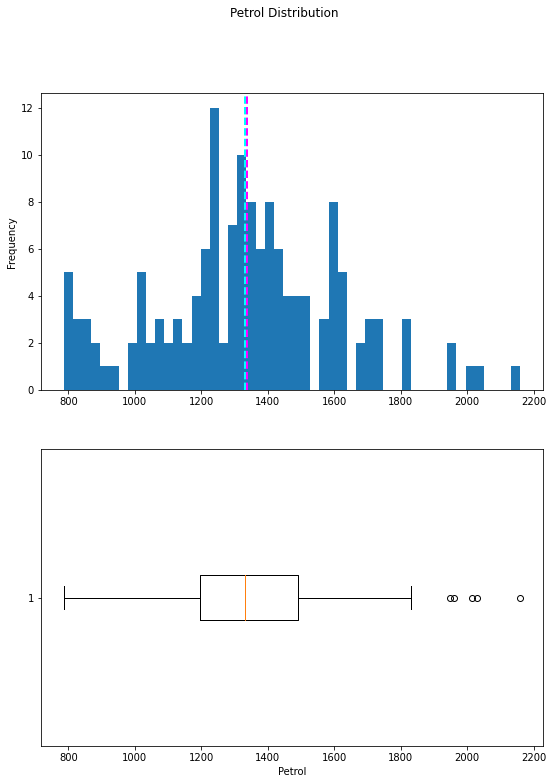

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = data['Petrol']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=25)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Petrol')

# Add a title to the Figure
fig.suptitle('Petrol Distribution')

# Show the figure
fig.show()


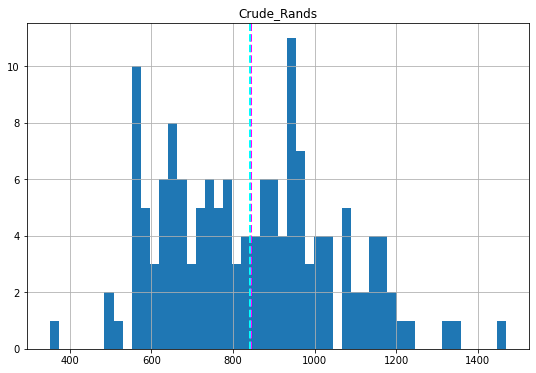

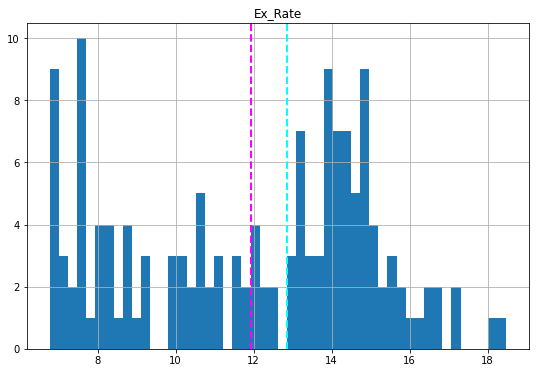

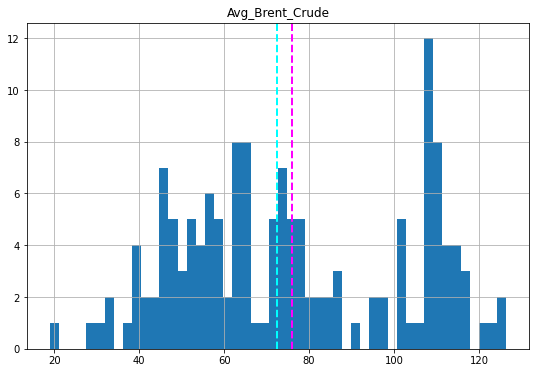

In [4]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=25, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

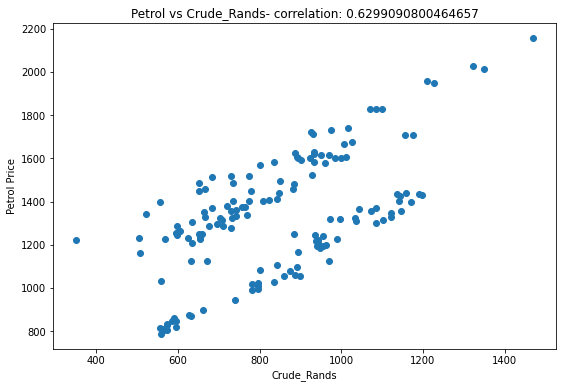

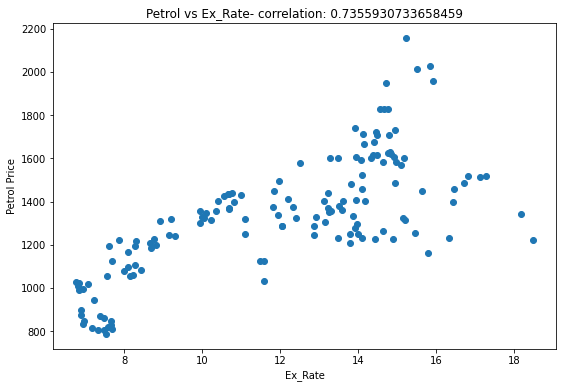

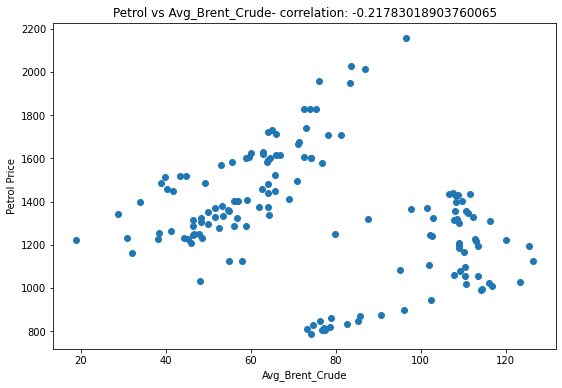

In [5]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Petrol']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Petrol Price')
    ax.set_title('Petrol vs ' + col + '- correlation: ' + str(correlation))
plt.show()


### Train a Regression Model

In [6]:
X, y = data['Crude_Rands'].values, data['Petrol']
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[559.153026 574.26374  562.691934 589.726417 632.397675 584.26725
 572.318388 596.056076 566.324542 555.973083]

Labels:
0    786.0
1    804.0
2    810.3
3    858.3
4    871.8
5    844.8
6    826.8
7    816.8
8    806.8
9    811.8
Name: Petrol, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 117 rows
Test Set: 30 rows


In [8]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)
print (model)

LinearRegression()


### Evaluatee the Trained Model

In [9]:
import numpy as np

predictions = model.predict(X_test.reshape(-1, 1))
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1138. 1376. 1433. 1445. 1735. 1600. 1529. 1366. 1474. 1445.]
Actual labels   :  7       816.8
24     1061.4
27     1193.7
120    1616.2
143    2028.8
51     1441.7
43     1354.6
22     1077.4
112    1667.2
26     1123.4
Name: Petrol, dtype: float64


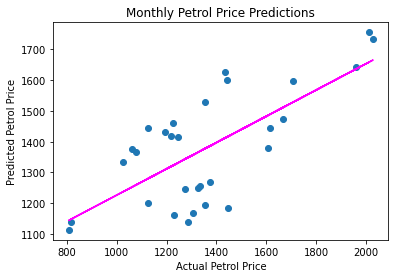

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Petrol Price')
plt.ylabel('Predicted Petrol Price')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 46840.85683016303
RMSE: 216.42748630930183
R2: 0.48019194614118255
